# **Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import scipy as sp
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Setting visualization settings
# %matplotlib inline

In [ ]:
%matplotlib inline

# **1. Data Collection**

# Load the dataset

In [ ]:
path = '/content/drive/MyDrive/Dataset/amazon.csv'
data = pd.read_csv(path)

# Display the first few rows of the dataset

In [ ]:
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# Display the columns in the dataset

In [ ]:
data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

# Get basic information about the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

# Summary of the dataset shape

In [ ]:
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset contains 1465 rows and 16 columns.


# **2. Data Cleaning**

# Checking for missing values

In [ ]:
data.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


# **2.1 Data Type Conversion**

# Convert 'discounted_price' and 'actual_price' columns to numerical values

In [ ]:
data['discounted_price'] = data['discounted_price'].str.replace("₹",'').str.replace(",",'').astype('float64')
data['actual_price'] = data['actual_price'].str.replace("₹",'').str.replace(",",'').astype('float64')

# Convert 'discount_percentage' to a float and scale appropriately

In [ ]:
data['discount_percentage'] = data['discount_percentage'].str.replace('%','').astype('float64') / 100

# **2.2 Handling Inconsistent Data**


# Find and replace unusual strings in the 'rating' column

In [ ]:
unusual_ratings = data['rating'].value_counts()
print("Unusual Ratings Found:")
print(unusual_ratings)

Unusual Ratings Found:
rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64



# Replace the incorrect rating for the specific product

In [ ]:
data['rating'] = data['rating'].str.replace('|', '3.9').astype('float64')

# Convert 'rating_count' to numerical values

In [ ]:
data['rating_count'] = data['rating_count'].str.replace(',', '').astype('float64')

# **2.3 Duplicate and Missing Data Checks**


# Checking for duplicate rows

In [ ]:
duplicates = data.duplicated()
if duplicates.any():
    print("Duplicate rows found:")
    print(data[duplicates])
else:
    print("No duplicate rows found.")


No duplicate rows found.


# Re-checking for missing values after cleaning

In [ ]:
missing_values = data.isna().sum()
print("Missing Values After Cleaning:")
print(missing_values)

Missing Values After Cleaning:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


# Display the cleaned dataset

In [ ]:
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# **3. Exploratory Data Analysis (EDA)**

# **3.1 Correlation Analysis**

# Select only numerical columns for correlation analysis

In [ ]:
numerical_data = data[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']]

# Pearson Correlation Matrix

In [ ]:
correlation_matrix = numerical_data.corr()
print("Pearson Correlation Matrix:")
print(correlation_matrix)

Pearson Correlation Matrix:
                     discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.961915            -0.242412   
actual_price                 0.961915      1.000000            -0.118098   
discount_percentage         -0.242412     -0.118098             1.000000   
rating                       0.120386      0.121744            -0.154563   
rating_count                -0.027261     -0.036137             0.011691   

                       rating  rating_count  
discounted_price     0.120386     -0.027261  
actual_price         0.121744     -0.036137  
discount_percentage -0.154563      0.011691  
rating               1.000000      0.102401  
rating_count         0.102401      1.000000  


# Visualize Pearson Correlation Matrix

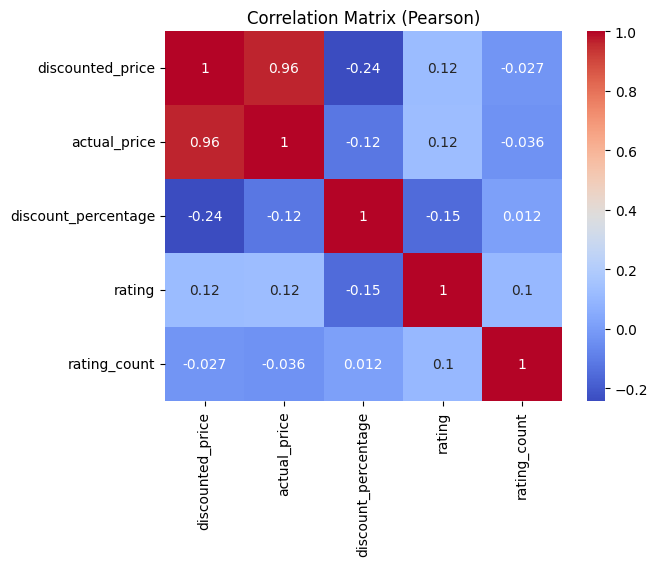

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Pearson)")
plt.show()

# Spearman Correlation Matrix (for non-linear relationships)

In [ ]:
spearman_correlation_matrix = numerical_data.corr(method="spearman")
print("Spearman Correlation Matrix:")
print(spearman_correlation_matrix)

Spearman Correlation Matrix:
                     discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.932787            -0.372991   
actual_price                 0.932787      1.000000            -0.066363   
discount_percentage         -0.372991     -0.066363             1.000000   
rating                       0.079412      0.033066            -0.144815   
rating_count                 0.122408      0.093456            -0.096727   

                       rating  rating_count  
discounted_price     0.079412      0.122408  
actual_price         0.033066      0.093456  
discount_percentage -0.144815     -0.096727  
rating               1.000000      0.181318  
rating_count         0.181318      1.000000  


# Visualize Spearman Correlation Matrix

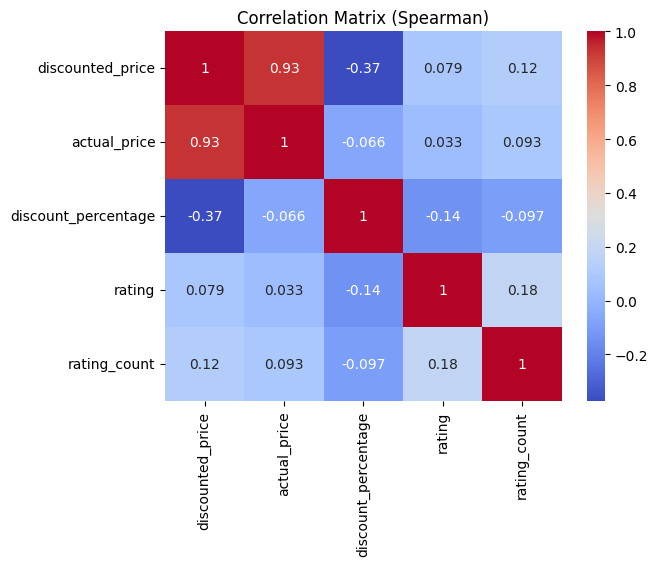

In [ ]:
sns.heatmap(spearman_correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Spearman)")
plt.show()

# **3.2 Scatter Plots and Distributions**

# Scatter plot of Discounted Price vs Actual Price

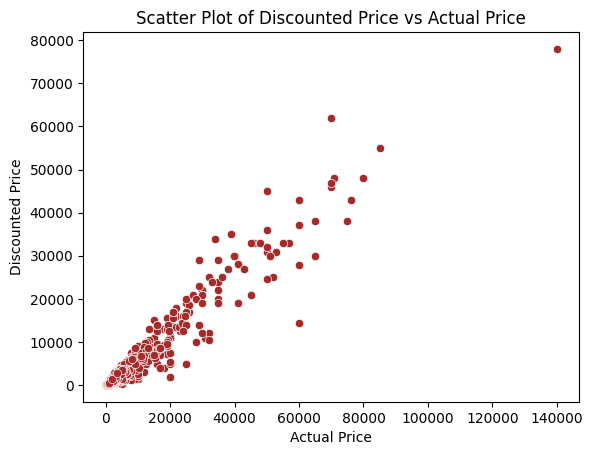

In [ ]:
sns.scatterplot(x='actual_price', y='discounted_price', data=data, color='brown')
plt.xlabel("Actual Price")
plt.ylabel("Discounted Price")
plt.title("Scatter Plot of Discounted Price vs Actual Price")
plt.show()

# Scatter plot of Actual Price vs Rating

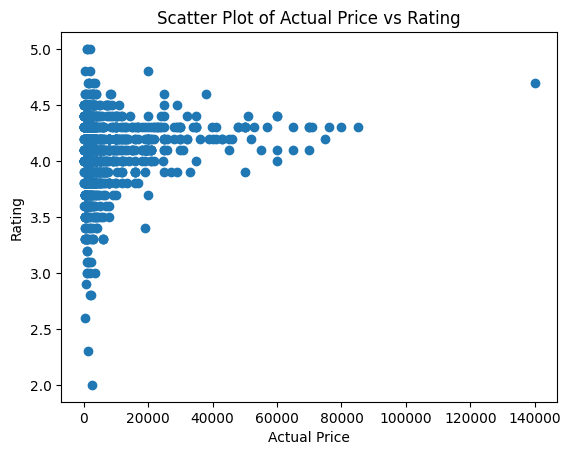

In [ ]:
plt.scatter(data['actual_price'], data['rating'])
plt.xlabel('Actual Price')
plt.ylabel('Rating')
plt.title('Scatter Plot of Actual Price vs Rating')
plt.show()

# Distribution of Actual Prices

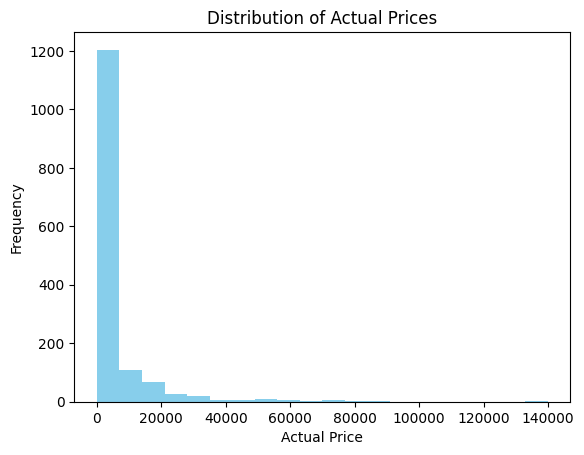

In [ ]:
plt.hist(data['actual_price'], bins=20, color='skyblue')
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Prices')
plt.show()

# **3.3 Category-Based Analysis**

# Mean Rating by Product Category

In [ ]:
grouped_df = data.groupby('category')['rating'].mean()
print("Mean Rating by Product Category:")
print(grouped_df)

Mean Rating by Product Category:
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|

# **3.4 Product Category Distributions**

# Creating 'main_category' and 'sub_category' from the 'category' column

In [ ]:
data['main_category'] = data['category'].str.split('|').str[0]
data['sub_category'] = data['category'].str.split('|').str[-1]

# Distribution of Products by Main Category (Top 30)

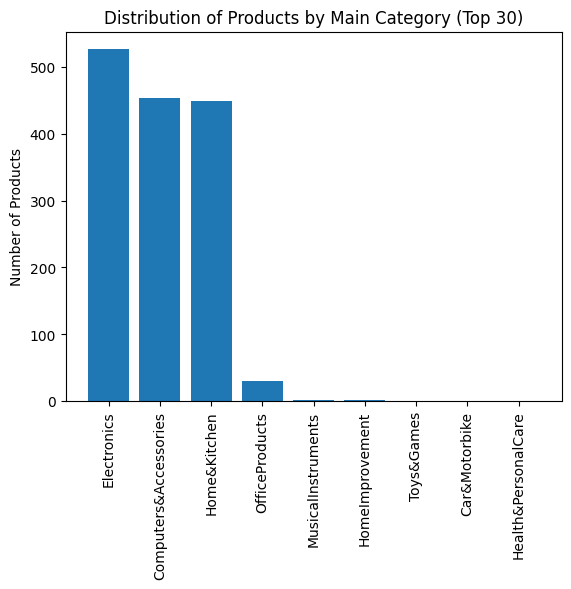

In [ ]:
main_category_counts = data['main_category'].value_counts().head(30)
plt.bar(range(len(main_category_counts)), main_category_counts.values)
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Main Category (Top 30)')
plt.xticks(range(len(main_category_counts)), main_category_counts.index, rotation=90)
plt.show()

# Display Top 30 Main Categories

In [ ]:
top_main_categories = pd.DataFrame({'Main Category': main_category_counts.index, 'Number of Products': main_category_counts.values})
print('Top 30 Main Categories:')
print(top_main_categories.to_string(index=False))

Top 30 Main Categories:
        Main Category  Number of Products
          Electronics                 526
Computers&Accessories                 453
         Home&Kitchen                 448
       OfficeProducts                  31
   MusicalInstruments                   2
      HomeImprovement                   2
           Toys&Games                   1
        Car&Motorbike                   1
  Health&PersonalCare                   1


# Distribution of Products by Sub Category (Top 30)

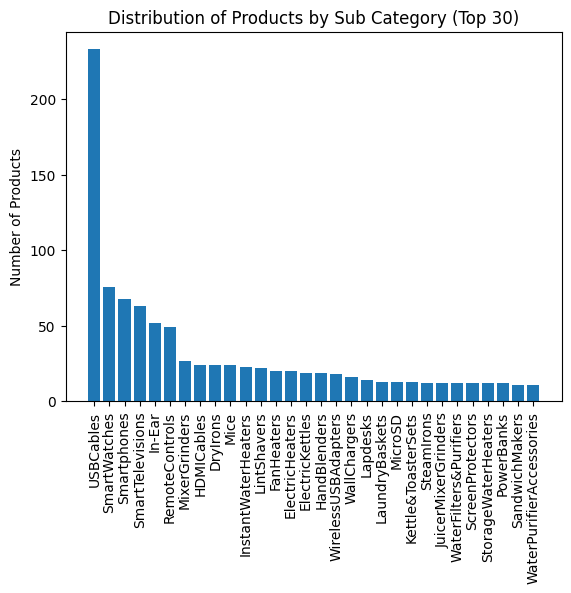

In [ ]:
sub_category_counts = data['sub_category'].value_counts().head(30)
plt.bar(range(len(sub_category_counts)), sub_category_counts.values)
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Sub Category (Top 30)')
plt.xticks(range(len(sub_category_counts)), sub_category_counts.index, rotation=90)
plt.show()

# Display Top 30 Sub Categories

In [ ]:
top_sub_categories = pd.DataFrame({'Sub Category': sub_category_counts.index, 'Number of Products': sub_category_counts.values})
print('Top 30 Sub Categories:')
print(top_sub_categories.to_string(index=False))

Top 30 Sub Categories:
            Sub Category  Number of Products
               USBCables                 233
            SmartWatches                  76
             Smartphones                  68
        SmartTelevisions                  63
                  In-Ear                  52
          RemoteControls                  49
           MixerGrinders                  27
              HDMICables                  24
                DryIrons                  24
                    Mice                  24
     InstantWaterHeaters                  23
             LintShavers                  22
              FanHeaters                  20
         ElectricHeaters                  20
         ElectricKettles                  19
            HandBlenders                  19
     WirelessUSBAdapters                  18
            WallChargers                  16
                Lapdesks                  14
          LaundryBaskets                  13
                 MicroSD        

# **3.5 Rating Analysis by Category**

# Top 10 Main Categories by Average Rating

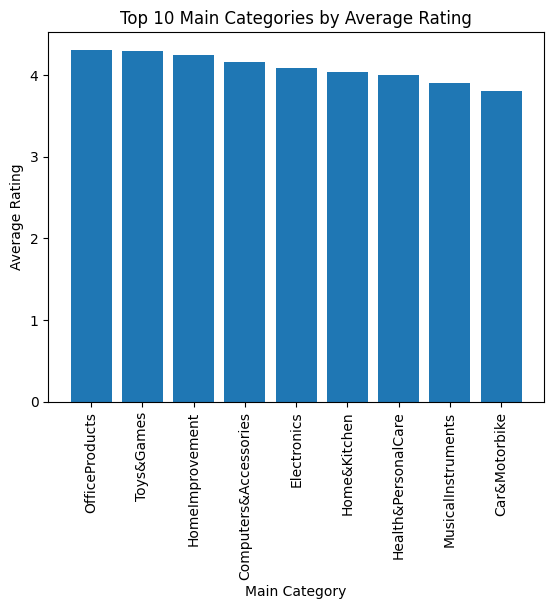

In [ ]:
top_main_categories_by_rating = data.groupby('main_category')['rating'].mean().sort_values(ascending=False).head(10)
plt.bar(top_main_categories_by_rating.index, top_main_categories_by_rating.values)
plt.xlabel('Main Category')
plt.ylabel('Average Rating')
plt.title('Top 10 Main Categories by Average Rating')
plt.xticks(rotation=90)
plt.show()

# Top 10 Sub Categories by Average Rating

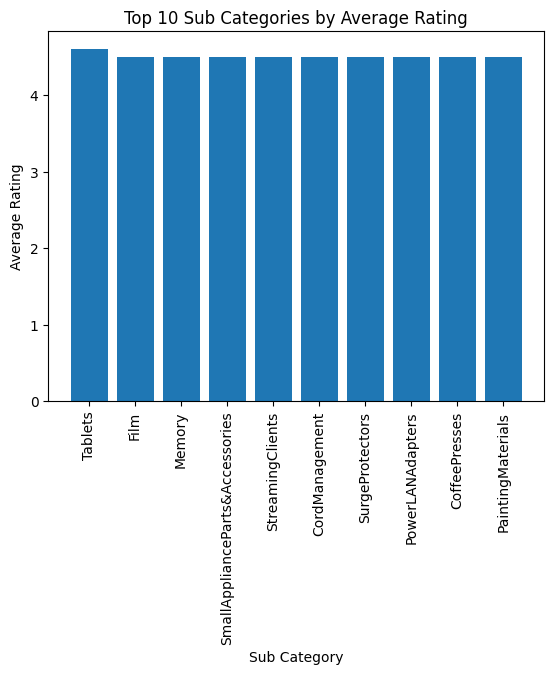

In [ ]:
top_sub_categories_by_rating = data.groupby('sub_category')['rating'].mean().sort_values(ascending=False).head(10)
plt.bar(top_sub_categories_by_rating.index, top_sub_categories_by_rating.values)
plt.xlabel('Sub Category')
plt.ylabel('Average Rating')
plt.title('Top 10 Sub Categories by Average Rating')
plt.xticks(rotation=90)
plt.show()

# **3.6 Discount Analysis by Category**

# Mean Discount Percentage by Main Category

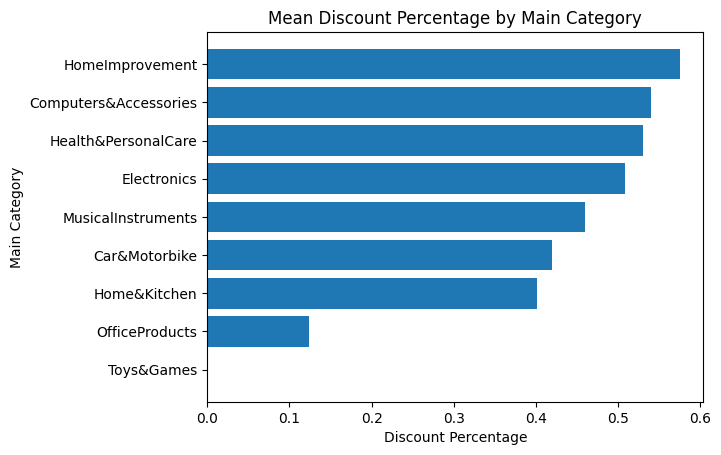

In [ ]:
mean_discount_by_category = data.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=True)
plt.barh(mean_discount_by_category.index, mean_discount_by_category.values)
plt.title('Mean Discount Percentage by Main Category')
plt.xlabel('Discount Percentage')
plt.ylabel('Main Category')
plt.show()

# Display Mean Discount Percentage by Main Category

In [ ]:
table = pd.DataFrame({'Main Category': mean_discount_by_category.index, 'Mean Discount Percentage': mean_discount_by_category.values})
print(table)

           Main Category  Mean Discount Percentage
0             Toys&Games                  0.000000
1         OfficeProducts                  0.123548
2           Home&Kitchen                  0.401205
3          Car&Motorbike                  0.420000
4     MusicalInstruments                  0.460000
5            Electronics                  0.508289
6    Health&PersonalCare                  0.530000
7  Computers&Accessories                  0.540243
8        HomeImprovement                  0.575000


# Mean Discount Percentage by Sub Category (Top 15)

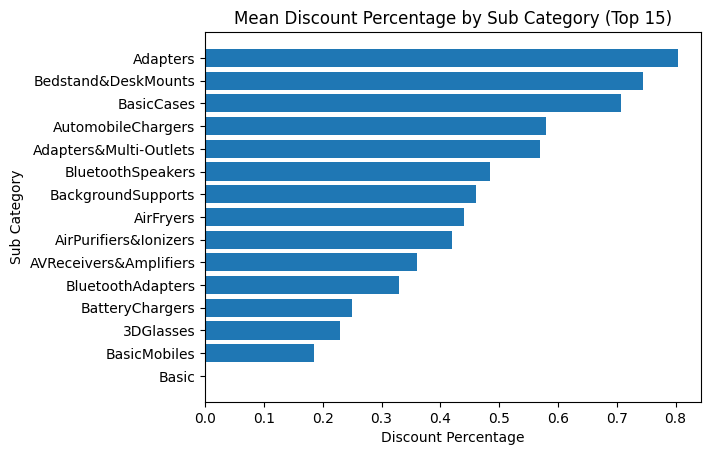

In [ ]:
mean_discount_by_sub_category = data.groupby('sub_category')['discount_percentage'].mean().head(15).sort_values(ascending=True)
plt.barh(mean_discount_by_sub_category.index, mean_discount_by_sub_category.values)
plt.title('Mean Discount Percentage by Sub Category (Top 15)')
plt.xlabel('Discount Percentage')
plt.ylabel('Sub Category')
plt.show()

# Display Mean Discount Percentage by Sub Category

In [ ]:
table = pd.DataFrame({'Sub Category': mean_discount_by_sub_category.index, 'Mean Discount Percentage': mean_discount_by_sub_category.values})
print(table)

              Sub Category  Mean Discount Percentage
0                    Basic                  0.000000
1             BasicMobiles                  0.185556
2                3DGlasses                  0.230000
3          BatteryChargers                  0.250000
4        BluetoothAdapters                  0.330000
5   AVReceivers&Amplifiers                  0.360000
6    AirPurifiers&Ionizers                  0.420000
7                AirFryers                  0.440000
8       BackgroundSupports                  0.460000
9        BluetoothSpeakers                  0.485000
10  Adapters&Multi-Outlets                  0.570000
11      AutomobileChargers                  0.580000
12              BasicCases                  0.707500
13     Bedstand&DeskMounts                  0.745000
14                Adapters                  0.803333


# **3.7 Review Text Analysis**

# Generate Word Cloud for All Reviews

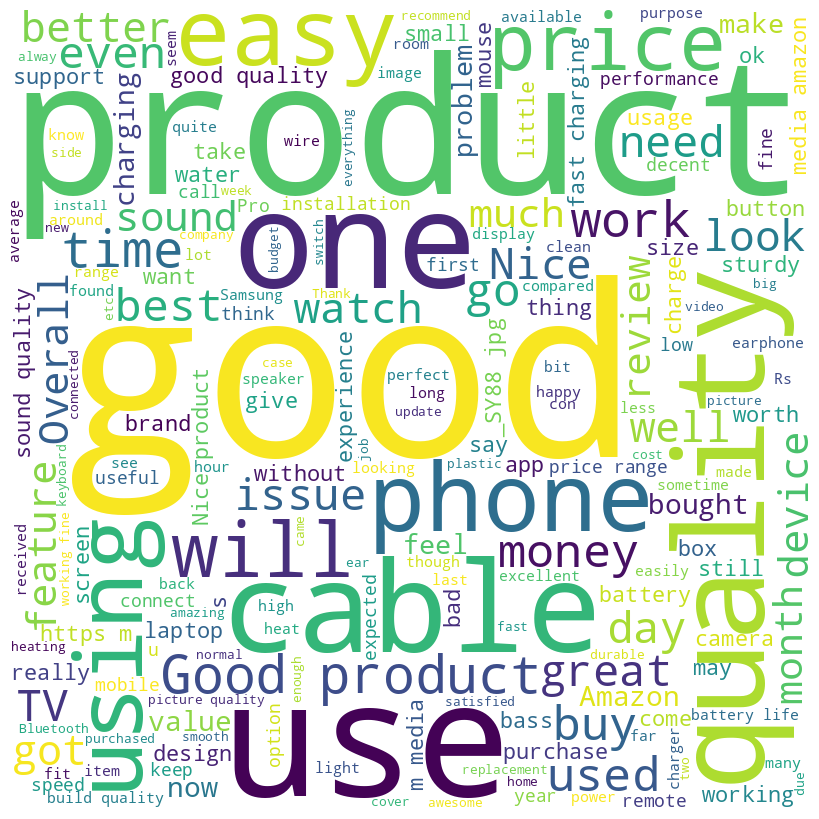

In [ ]:
reviews_text = ' '.join(data['review_content'].dropna().values)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(reviews_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Generate Word Cloud for Reviews of Highly Rated Products (Rating > 4.0)

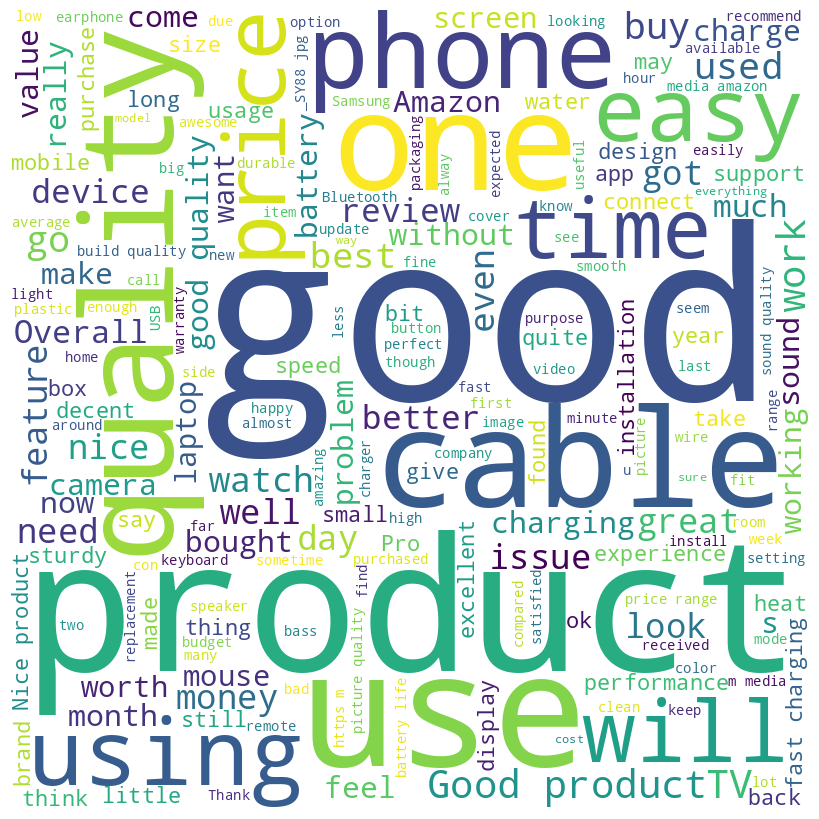

In [ ]:
high_rating_reviews_text = ' '.join(data[data['rating'] > 4.0]['review_content'].dropna().values)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(high_rating_reviews_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# **4. Recommendation System**

In this section, we will develop a recommendation system that suggests products to users based on their purchase history and the similarity between product descriptions. The approach taken leverages TF-IDF Vectorization and Cosine Similarity to calculate the relevance of products based on textual data.

# **4.1 Data Preparation for Recommendation**

Before we build the recommendation system, it's crucial to preprocess the user identifiers. We will encode the user_id to a numerical format using LabelEncoder. This step is necessary because machine learning models often perform better with numerical data.

# Encode user_id into a numerical format

In [ ]:
le = LabelEncoder()
data['user_id_encoded'] = le.fit_transform(data['user_id'])

# Create a frequency table to understand the distribution of users

In [ ]:
freq_table = pd.DataFrame({'User ID': data['user_id_encoded'].value_counts().index, 'Frequency': data['user_id_encoded'].value_counts().values})

# Display the frequency table and an example of a user_id_encoded

In [ ]:
print(freq_table)
id_example = freq_table.iloc[0, 0]
print(id_example)

      User ID  Frequency
0        1048         10
1         623          8
2         674          8
3         254          7
4          88          7
...       ...        ...
1189      429          1
1190      506          1
1191       11          1
1192      900          1
1193      433          1

[1194 rows x 2 columns]
1048


# **4.2 Implementing the Recommendation System**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def recommend_products(df, user_id_encoded):
    tfidf = TfidfVectorizer(stop_words='english')
    df['about_product'] = df['about_product'].fillna('')
    tfidf_matrix = tfidf.fit_transform(df['about_product'])
    user_history = df[df['user_id_encoded'] == user_id_encoded]
    indices = user_history.index.tolist()

    if indices:
        cosine_sim_user = cosine_similarity(tfidf_matrix[indices], tfidf_matrix)
        products = df.iloc[indices]['product_name']
        indices = pd.Series(products.index, index=products)
        similarity_scores = list(enumerate(cosine_sim_user[-1]))
        similarity_scores = [(i, score) for (i, score) in similarity_scores if i not in indices]
        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
        top_products = [i[0] for i in similarity_scores[1:6]]
        recommended_products = df.iloc[top_products]['product_name'].tolist()
        score = [similarity_scores[i][1] for i in range(5)]
        results_df = pd.DataFrame({'Id Encoded': [user_id_encoded] * 5,
                                   'Recommended Product': recommended_products,
                                   'Score Recommendation': score})
        return results_df

    else:
        print("No purchase history found.")
        return None

# Example usage of the recommendation system

In [ ]:
recommend_products(data, id_example)

,Id Encoded,Recommended Product,Score Recommendation
0,1048,Flix Micro Usb Cable For Smartphone (Black),1.000000
1,1048,Flix Micro Usb Cable For Smartphone (Black),1.000000
2,1048,FLiX (Beetel USB to Micro USB PVC Data Sync & ...,1.000000
3,1048,pTron Solero M241 2.4A Micro USB Data & Chargi...,0.911706
4,1048,Flix (Beetel) Usb To Type C Pvc Data Sync And ...,0.677355
